In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read, write
from scipy.signal import find_peaks
from IPython.display import Audio


%matplotlib inline

## Generación de sonidos con elección arbitraria de frecuencia y amplitud de tonos

Este código permite generar un archivo de audio .wav con elección de hasta 10 tonos con su correspondiente frecuencia y amplitud. El rango espectral va desde 0 Hz hasta 20000 Hz, pero este último valor se puede cambiar en la siguiente celda simplemente cambiando el valor de freqlimit. En las siguiente línea determinamos también la frecuencia de muestreo que consideraremos para la señal generada (FS).

In [58]:
FRECLIMIT = 20000
FS = 48000

## Elección de frecuencias y amplitudes

Para elegir frecuencias y amplitudes, basta con cambiar los datos en la siguiente celda, teniendo en cuenta que se sigue el formato (frecuencia, amplitud) para cada posible tono. En caso de que se quieran dejar tonos sin completar, basta con poner (-1,0). El valor de la amplitud se puede variar desde 0 hasta 100.

Ejemplo: queremos incorporar como primer valor un tono a 240 Hz y amplitud 50. Lo pondríamos como:

frecuencia[1] = (240,50)

Y así sucesivamente.

In [76]:
frecuencia=np.zeros((10,2)) 

#Completar con las frecuencias y amplitudes deseadas
frecuencia[0]=(0,0)
frecuencia[1]=(200,100)
frecuencia[2]=(-1,50)
frecuencia[3]=(-1,0)
frecuencia[4]=(-1,0)
frecuencia[5]=(-1,0)
frecuencia[6]=(-1,0)
frecuencia[7]=(-1,0)
frecuencia[8]=(-1,0)
frecuencia[9]=(-1,0)

## Representación espectral

La onda que has elegido tiene la siguiente distribución espectral

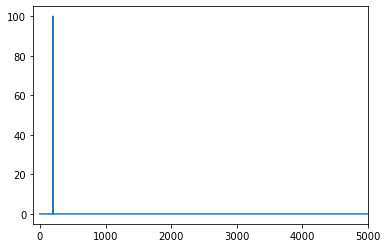

In [77]:
spectrum = np.zeros(FRECLIMIT+1)

for i in range(len(frecuencia[:,0])):
    if frecuencia[i,0] >=0:
        spectrum[int(frecuencia[i,0])]=frecuencia[i,1]

plt.figure()
plt.xlim(left=-100,right=5000)
plt.plot(spectrum)
plt.show()

## Transformación al dominio del tiempo

Para realizar la transformación al dominio del tiempo, debemos elegir el tiempo de ataque, el de mantenimiento de la nota y el de caída. El tiempo se debe expresar en milisegundos (ms). Para ello completamos las siguientes líneas con los valores deseados:

In [78]:
TATAQUE = 20
TMANTENIMIENTO = 100
TCAIDA = 2000

In [85]:
#Cálculo de la duración total y paso a segundos

tiempototal = (TATAQUE + TMANTENIMIENTO + TCAIDA)/1000.

tiempototal = 2

print(tiempototal)

npasos = int(FS*tiempototal)

print(npasos)
salida = np.fft.irfft(spectrum,n=npasos)

#for i in range(npasos):
#    if i < int(TATAQUE/1000./tiempototal*npasos):
#        salida[i] = salida[i]*i/int(TATAQUE/1000./tiempototal*npasos)
#    elif i > int((TATAQUE+TMANTENIMIENTO)/1000./tiempototal*npasos):
#        salida[i] = salida[i]*(npasos-i)/(npasos-int((TATAQUE+TMANTENIMIENTO)/1000./tiempototal*npasos))

2
96000


## Representación en el dominio temporal

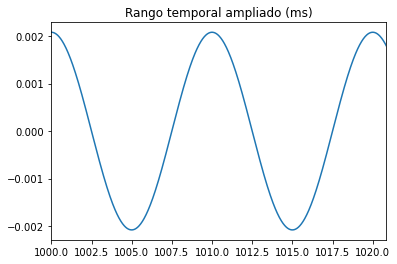

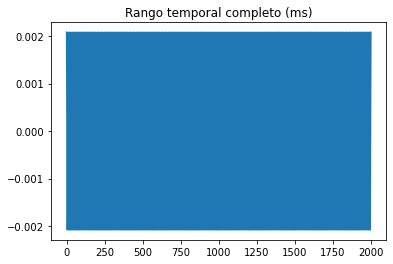

In [86]:

x = np.arange(0, tiempototal*1000, 1/FS*1000)

plt.figure()
plt.plot(x,salida)
plt.title("Rango temporal ampliado (ms)")
plt.xlim(left=tiempototal*1000/2,right=tiempototal*1000/2+1/FS*1000*1000)
plt.show()

plt.figure()
plt.title("Rango temporal completo (ms)")
plt.plot(x,salida)
plt.show()


## Audio de la onda generada

La onda generada se escucha así:

In [72]:
Audio(salida,rate=FS)

## FFT de la onda de salida - check

[  0. 120. 240.]


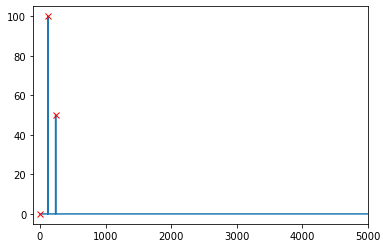

In [73]:
output = np.fft.fft(salida)

outputpos = np.absolute(output)

v = outputpos[:] 
outputpos[:] = (v) / (v.max()) *100.  #Normalizamos al máximo de 100

timestep = 1/FS

n=int(outputpos.size/2)

frequencies = np.fft.fftfreq(outputpos.size,d=timestep)

f=frequencies[:n]

peaks,_ = find_peaks(outputpos[:n], height=5, distance = 2)
                     
peaks = np.insert(peaks,0,0)

plt.figure()
plt.xlim(left=-100,right=5000)
plt.plot(f,outputpos[:n])
plt.plot(f[peaks],outputpos[peaks],"x",color='red')

print(f[peaks])
plt.show()
